In [15]:
source('simData.R')
library("WGCNA")
library("caret")
library(randomForest)
library("fuzzyforest")

In [2]:
p = 400
p0 = 100

#### covariance matrix between features: it is either 0 (independent) or cor_feature ####
cov_feature = matrix(0,nrow = p, ncol = p)
# cov within the first three modules
cov_star = matrix(0.8,nrow = p0,ncol = p0)
diag(cov_star)=1
# put cov_star into cov_feature
cov_feature[1:p0,1:p0] = cov_star
cov_feature[(p0+1):(2*p0),(p0+1):(2*p0)] = cov_star
cov_feature[(2*p0+1):(3*p0),(2*p0+1):(3*p0)] = cov_star
cov_feature[(3*p0+1):(4*p0),(3*p0+1):(4*p0)] = diag(p0)
####

Independent features or grouped features, with time structure, just linear or non linear model. Note that in reduced dataset, we only have grouped features and n=100 samples but not time structure.

# Linear Test

In [30]:
n = 100
p = 400
X = mvrnorm(n = n, rep(0, p),diag(p)) # no grouped features
# X = mvrnorm(n = n, rep(0, p),cov_feature) # grouped features
y = 5*X[,1]+2*X[,2]+2*X[,3]+5*X[,301]+2*X[,302]+2*X[,303]

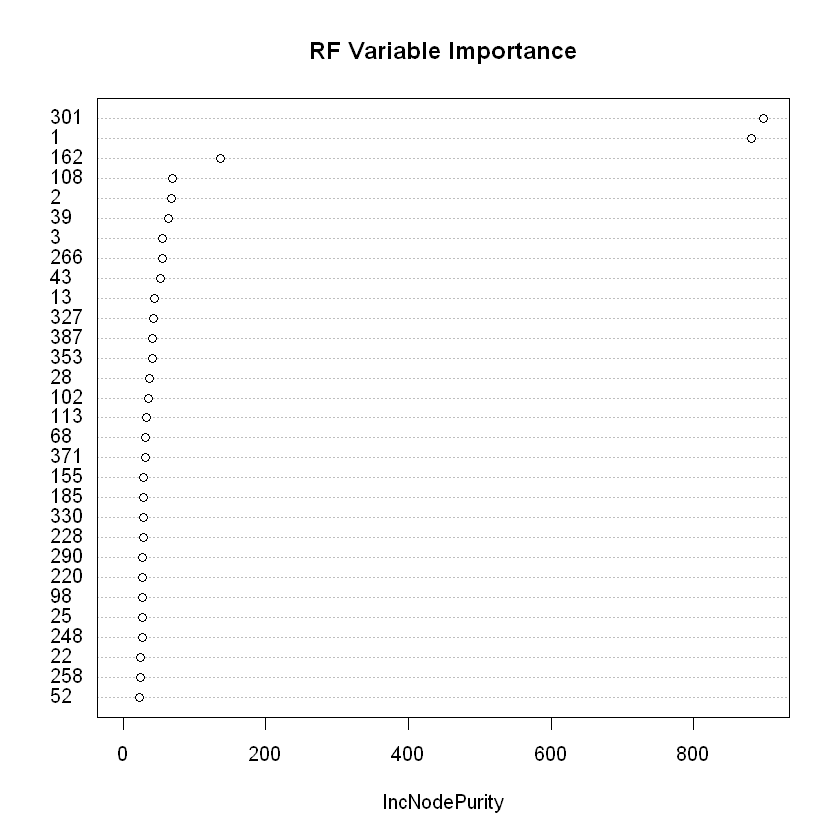

In [31]:
rf <- randomForest(X,y)
varImpPlot(rf,type=2,main="RF Variable Importance")

Warning message in blockwiseModules(datExpr = structure(list(V1 = c(1.10771678377556, :
"blockwiseModules: mergeCloseModules failed with the following error message:
     Error in mergeCloseModules(datExpr, colors[gsg$goodGenes], cutHeight = mergeCutHeight,  : 
  Error in moduleEigengenes(expr = exprData[[set]]$data, colors = setColors,  : 
  Color levels are empty. Possible reason: the only color is grey and grey module is excluded from the calculation.

 
--> returning unmerged colors.
"

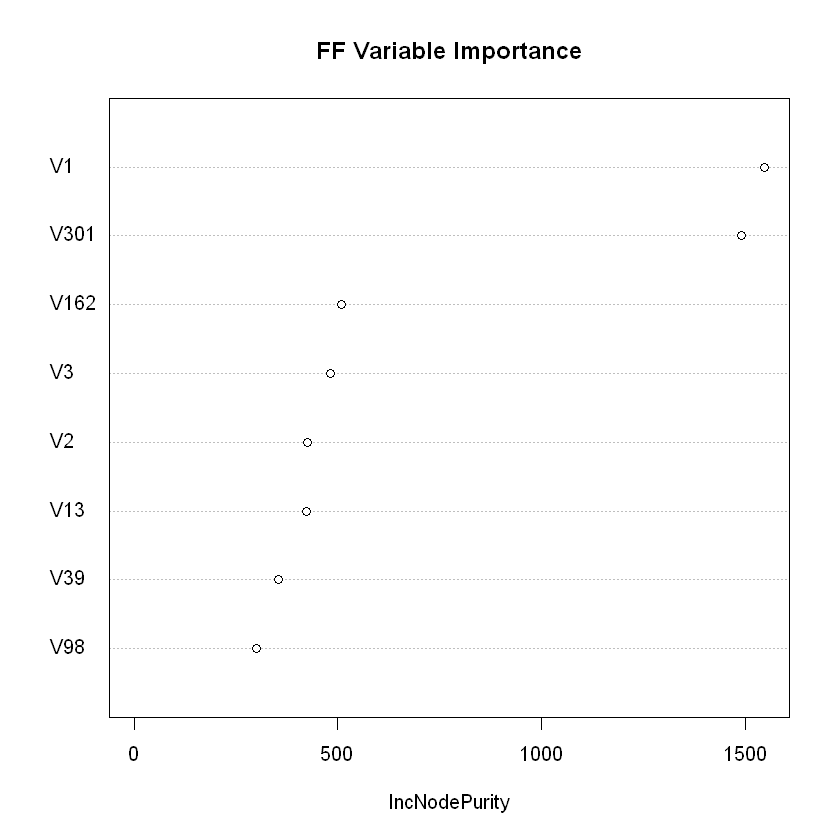

In [32]:
X =as.data.frame(X)

# Fuzzy Forest
# params is stored in xxx_control object
# power: belta (I choose it without much care)
WGCNA_params = WGCNA_control(power=3,TOMType="unsigned",minModuleSize=30,
                            numericLabels=TRUE,pamRespectsDendro=FALSE)

mtry_factor     = 1 # mtry = sqrt(p)*mtry_factor; mtry is the num in subspace method
drop_fraction   = 0.25 # drop xxx in each iteration of RFE-RF
number_selected = 8 # we want 10 out of all features
keep_fraction   = 0.05 # keep xxx for each module
min_ntree        = 500 # used for calculating ntree
ntree_factor    = 5 # used for calculating ntree
final_ntree     = 500 # RF in selecting step

screen_params = screen_control(drop_fraction = drop_fraction,
                              keep_fraction  = keep_fraction,
                              min_ntree      = min_ntree,
                              mtry_factor    = mtry_factor,
                              ntree_factor   = ntree_factor)

select_params = select_control(drop_fraction  = drop_fraction,
                              number_selected = number_selected,
                              min_ntree       = min_ntree,
                              mtry_factor     = mtry_factor,
                              ntree_factor    = ntree_factor)    

# a "fuzzy_forest" object
wff_fit = wff(X,y,WGCNA_params = WGCNA_params,
             screen_params = screen_params,
             select_params = select_params,
             final_ntree = final_ntree)

varImpPlot(wff_fit$final_rf,type=2,main="FF Variable Importance")

# Nonlinear Test

In [45]:
n = 500
p = 400
# X = mvrnorm(n = n, rep(0, p),diag(p)) # no grouped features
X = mvrnorm(n = n, rep(0, p),cov_feature) # grouped features
y = (5*X[,1]+2*X[,2]+2*X[,3]+5*X[,2]*X[,3]
         +5*X[,301]+2*X[,302]+2*X[,303]+5*X[,302]*X[,303])

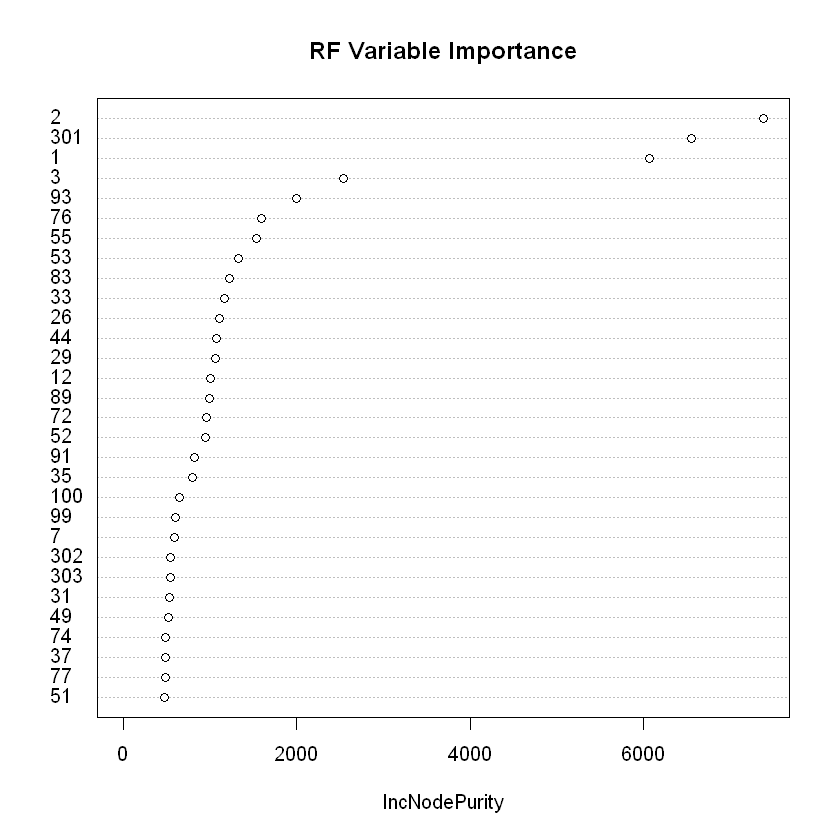

In [46]:
rf <- randomForest(X,y)
varImpPlot(rf,type=2,main="RF Variable Importance")

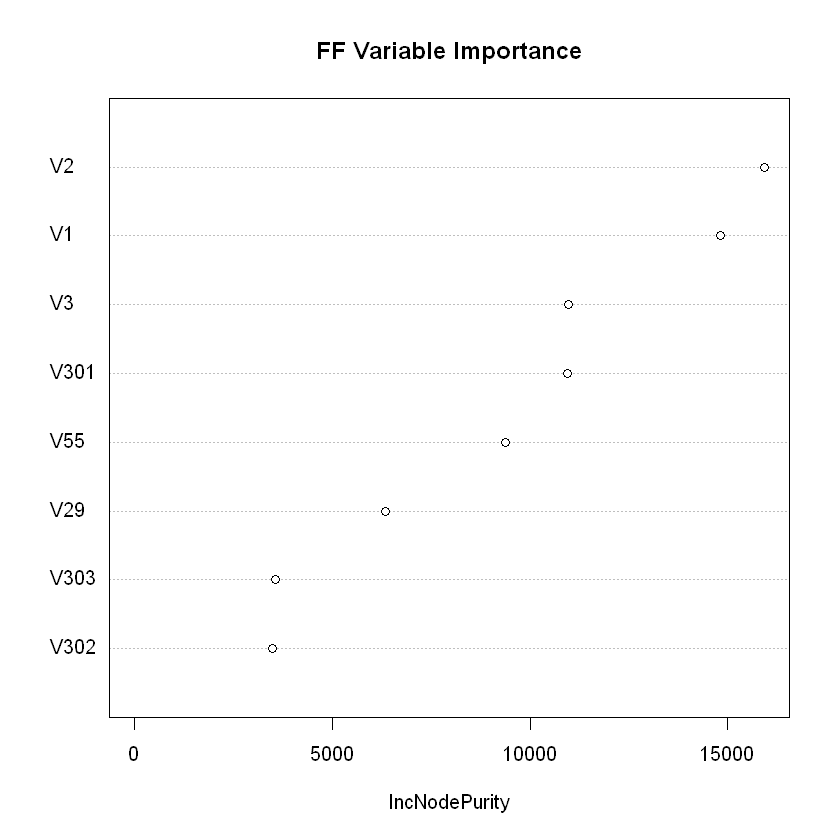

In [47]:
X =as.data.frame(X)

# Fuzzy Forest
# params is stored in xxx_control object
# power: belta (I choose it without much care)
WGCNA_params = WGCNA_control(power=3,TOMType="unsigned",minModuleSize=30,
                            numericLabels=TRUE,pamRespectsDendro=FALSE)

mtry_factor     = 1 # mtry = sqrt(p)*mtry_factor; mtry is the num in subspace method
drop_fraction   = 0.25 # drop xxx in each iteration of RFE-RF
number_selected = 8 # we want 10 out of all features
keep_fraction   = 0.05 # keep xxx for each module
min_ntree        = 500 # used for calculating ntree
ntree_factor    = 5 # used for calculating ntree
final_ntree     = 500 # RF in selecting step

screen_params = screen_control(drop_fraction = drop_fraction,
                              keep_fraction  = keep_fraction,
                              min_ntree      = min_ntree,
                              mtry_factor    = mtry_factor,
                              ntree_factor   = ntree_factor)

select_params = select_control(drop_fraction  = drop_fraction,
                              number_selected = number_selected,
                              min_ntree       = min_ntree,
                              mtry_factor     = mtry_factor,
                              ntree_factor    = ntree_factor)    

# a "fuzzy_forest" object
wff_fit = wff(X,y,WGCNA_params = WGCNA_params,
             screen_params = screen_params,
             select_params = select_params,
             final_ntree = final_ntree)

varImpPlot(wff_fit$final_rf,type=2,main="FF Variable Importance")